# Synthetic experiment
This notebook reproduces the *synthetic experiments* described in Section 5 of the paper titled "On the convergence of ADAM and beyond" (Reddi, Kale and Kumar 2018).

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt

## Optimizer

In [2]:
class Adam:

    def __init__(self, x0, amsgrad=False, alpha=0.001, beta1=0.9, beta2=0.999,
                 F=None, epsilon=1e-8, decay=False):
        self.x = x0

        self.amsgrad = amsgrad
        self.alpha = alpha
        self.beta1 = beta1
        self.beta2 = beta2
        self.F = F
        self.epsilon = epsilon
        self.decay = decay

        self.m = 0
        self.v = 0
        self.t = 0
        self.vmax = 0

    def step(self, grad):
        self.t = self.t + 1
        self.m = self.beta1 * self.m + (1 - self.beta1) * grad
        self.v = self.beta2 * self.v + (1 - self.beta2) * grad**2

        if self.amsgrad:
            self.vmax = max(self.vmax, self.v)
            m = self.m
            v = self.v_amsg
        else:
            m = self.m / (1 - self.beta1**self.t)
            v = self.v / (1 - self.beta2**self.t)

        lr = self.alpha / np.sqrt(self.t) if self.decay else self.alpha
        x_updated = self.x - lr * m / (np.sqrt(v) + self.epsilon)
        self.x = x_updated self.F is None else np.clip(x_updated, self.F[0], self.F[1])

        return self.x


## Experiment

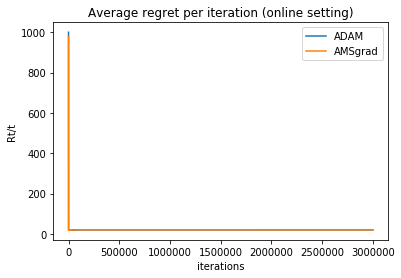

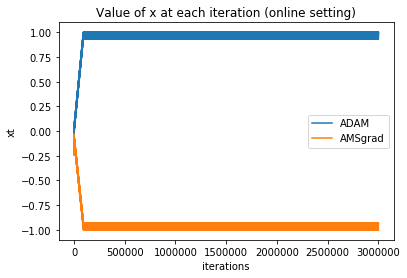

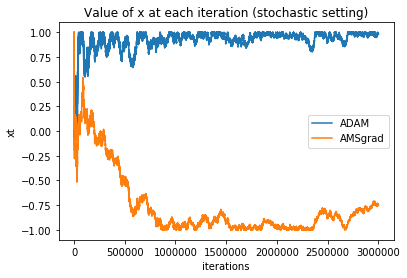

In [3]:
T = 3000000
F = (-1, 1)

adam_o = Adam(0, F=F, alpha=0.01)
amsg_o = Adam(0, amsgrad=True, F=F, alpha=0.01)

adam_s = Adam(1, F=F, alpha=0.5, decay=True)
amsg_s = Adam(1, amsgrad=True, F=F, alpha=0.5, decay=True)

iterations = range(1, T + 1)
xs_adam_o, xs_amsg_o = [], []
xs_adam_s, xs_amsg_s = [], []
regrets_adam, regrets_amsg = [], []
regret_adam, regret_amsg = 0, 0

for t in iterations:    
    # Gradients
    grad_o = (1010 if t % 101 == 1 else -10)
    grad_s = (1010 if np.random.random() < 0.01 else -10)

    # Update the xs
    x_adam_o = adam_o.step(grad_o)
    x_amsg_o = amsg_o.step(grad_o)
    x_adam_s = adam_s.step(grad_s)
    x_amsg_s = amsg_s.step(grad_s)

    xs_adam_o.append(x_adam_o)
    xs_amsg_o.append(x_amsg_o)
    xs_adam_s.append(x_adam_s)
    xs_amsg_s.append(x_amsg_s)

    # Losses
    min_loss = min(grad_o * F[0], grad_o * F[1])
    regret_adam += grad_o * x_adam_o - min_loss
    regret_amsg += grad_o * x_amsg_o - min_loss

    regrets_adam.append(regret_adam / t)
    regrets_amsg.append(regret_amsg / t)

plt.title('Average regret per iteration (online setting)')
plt.xlabel('iterations')
plt.ylabel('Rt/t')
plt.plot(iterations, regrets_adam, label='ADAM')
plt.plot(iterations, regrets_amsg, label='AMSgrad')
plt.legend()
plt.show()

plt.title('Value of x at each iteration (online setting)')
plt.xlabel('iterations')
plt.ylabel('xt')
plt.plot(iterations, xs_adam_o, label='ADAM')
plt.plot(iterations, xs_amsg_o, label='AMSgrad')
plt.legend()
plt.show()

plt.title('Value of x at each iteration (stochastic setting)')
plt.xlabel('iterations')
plt.ylabel('xt')
plt.plot(iterations, xs_adam_s, label='ADAM')
plt.plot(iterations, xs_amsg_s, label='AMSgrad')
plt.legend()
plt.show()
